# DATA VISUALIZATION

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import plotly.express as px
import datetime
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()

In [ ]:
def get_city_data(city):
    city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()
    
    list_of_dicts = []
    for city_bike_dict in city_bike_networks['networks']:
        new_city = city_bike_dict['location']['city']
        if new_city.lower() == city.lower():
            list_of_dicts.append(city_bike_dict)
            
    return list_of_dicts

In [ ]:
city_names = ['Stavnger', 'Copenhagen', 'Utrecht', 'Alma de Murcia', 'Aranjuez', 'Paris']

for each_city in city_names:
    print(get_city_data(each_city))
    print("-------------------\n")

In [26]:
get_city_data("Antwerpen")

[{'company': ['ClearChannel'],
  'href': '/v2/networks/velo-antwerpen',
  'id': 'velo-antwerpen',
  'location': {'city': 'Antwerpen',
   'country': 'BE',
   'latitude': 51.216667,
   'longitude': 4.4},
  'name': 'Velo Antwerpen'}]

In [27]:
def get_stations_info(city):
    
    station_dict = get_city_data(city)
    if not station_dict:
        print("Error: No bike company found for {}".format(city))
        return None
    
    network_address = station_dict[0]['href']
    url = "http://api.citybik.es/{}".format(network_address)
    return requests.get(url).json()['network']['stations']

In [28]:
city = "Antwerpen"
station_info = get_stations_info(city)
station_info

[{'empty_slots': 11,
  'extra': {'address': 'Koningin Astridplein', 'status': 'OPN', 'uid': 1},
  'free_bikes': 19,
  'id': '670e2836abf87ddc702ad790abaf8f10',
  'latitude': 51.21782,
  'longitude': 4.42065,
  'name': '001- Centraal Station - Astrid',
  'timestamp': '2023-01-09T17:49:13.145000Z'},
 {'empty_slots': 7,
  'extra': {'address': 'Groenkerkhofstraat/Nationalestraat',
   'status': 'OPN',
   'uid': 20},
  'free_bikes': 20,
  'id': 'ebdaa116e2ddfb4a3010a2847e69f60f',
  'latitude': 51.2188,
  'longitude': 4.401,
  'name': '020- Groenplaats 2',
  'timestamp': '2023-01-09T17:49:13.177000Z'},
 {'empty_slots': 8,
  'extra': {'address': 'sint vincentius', 'status': 'OPN', 'uid': 93},
  'free_bikes': 22,
  'id': '7cc97751ec977d34fc265b65aa88732c',
  'latitude': 51.20541,
  'longitude': 4.41356,
  'name': '093- Sint Vincentius',
  'timestamp': '2023-01-09T17:49:13.311000Z'},
 {'empty_slots': 4,
  'extra': {'address': 'Paleisstraat ', 'status': 'OPN', 'uid': 94},
  'free_bikes': 27,
  'i

In [29]:
def get_available_stations(city = "Antwerpen"):
    station_info = get_stations_info(city)
    
    station_list = []
    for info in station_info:
        
        a_dict = {
            'Station Name': info['name'],
            'empty_slots': info['empty_slots'],
            'free_bikes': info['free_bikes'],
            'payment': ', '.join(info['extra']['address']) if info['extra']['status'] else "No",
            'latitude': info['latitude'],
            'longitudee': info['longitude'],
            'timestamp': info['timestamp'],
            'Unique ID': info['extra']['uid'],
        }
        station_list.append(a_dict)
    return pd.DataFrame(station_list)

In [30]:
# Show available stations in Antwerpen
get_available_stations(city = "Antwerpen").sample(10)

,Station Name,empty_slots,free_bikes,payment,latitude,longitudee,timestamp,Unique ID
159,162 - Regatta,26,10,"B, l, a, n, c, e, f, l, o, e, r, l, a, a, n",51.219928,4.368736,2023-01-09T17:49:13.421000Z,162
204,236- Districtshuis Deurne,30,5,"M, a, u, r, i, c, e, , D, e, q, u, e, e, c, k...",51.219161,4.460066,2023-01-09T17:49:13.488000Z,236
259,291- Braem blokken,21,15,"M, a, u, r, i, t, s, , S, a, b, b, e, l, a, a, n",51.188503,4.372703,2023-01-09T17:49:13.561000Z,291
150,153- Beatrijslaan,16,20,"B, e, a, t, r, i, j, s, l, a, a, n",51.218529,4.385706,2023-01-09T17:49:13.389000Z,153
107,109- Kerkstraat,0,21,"K, e, r, k, s, t, r, a, a, t, , n, °, , 5, 8",51.218580,4.430513,2023-01-09T17:49:13.327000Z,109
60,056- Minderbroedersrui,23,6,"M, i, n, d, e, r, b, r, o, e, d, e, r, r, u, i...",51.222187,4.404588,2023-01-09T17:49:13.258000Z,56
296,332 - Valkstraat,30,6,"M, i, c, h, e, l, , G, e, y, s, e, m, a, n, s...",51.167514,4.385419,2023-01-09T17:49:13.617000Z,332
198,230- Bosuil,33,3,"B, o, s, u, i, l",51.229092,4.461910,2023-01-09T17:49:13.477000Z,230
3,094- Paleisstraat,4,27,"P, a, l, e, i, s, s, t, r, a, a, t,",51.204800,4.396100,2023-01-09T17:49:13.312000Z,94
245,277- Ahornen,35,1,"A, h, o, r, n, e, n, l, a, a, n,",51.177078,4.399725,2023-01-09T17:49:13.546000Z,277


# Show Map

In [31]:
current_date = datetime.date.today()
current_date

datetime.date(2023, 1, 9)

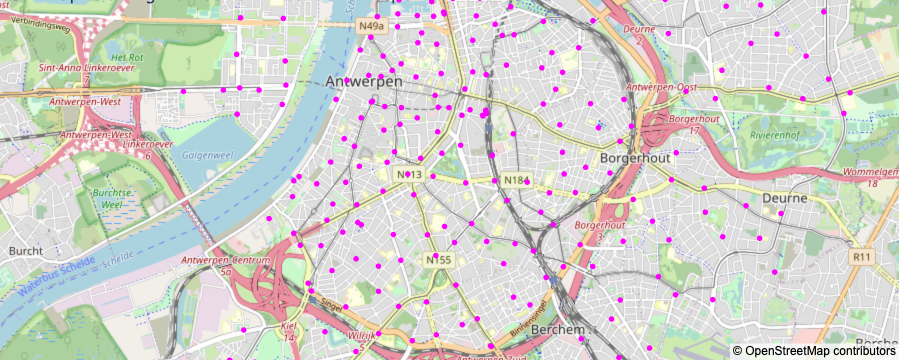

In [32]:
def show_map(station_info):
    
# Let's get the current date and time
    current_date = pd.to_datetime(station_info['timestamp'][0]).strftime('%a %d %B, %Y at %H:%M')

map_title = 'Map showing Number of Bikes in {} at {}'.format(city, current_date)

# Access token from plotly
#px.set_mapbox_access_token(ACCESS_MAP_TOKEN)

#fig = px.scatter_mapbox(station_data, lat="latitude", lon="longtitude", hover_name="Station Name", color="free_bikes",
                        #hover_data=["empty_slots", "free_bikes", "payment"],
                         #title=map_title,
fig = px.scatter_mapbox(station_info, lat="latitude", lon="longitude", hover_name="name", hover_data=["empty_slots", "free_bikes"],
                        title=map_title,
                        color_discrete_sequence=["fuchsia"], zoom=12, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()                      
#color_continuous_scale=px.colors.sequential.Plasma, size_max=20,zoom=12)
              

In [33]:
live_station_data = get_available_stations("Antwerpen")
show_map(live_station_data)

In [34]:
live_station_data

,Station Name,empty_slots,free_bikes,payment,latitude,longitudee,timestamp,Unique ID
0,001- Centraal Station - Astrid,11,19,"K, o, n, i, n, g, i, n, , A, s, t, r, i, d, p...",51.217820,4.420650,2023-01-09T17:49:13.145000Z,1
1,020- Groenplaats 2,7,20,"G, r, o, e, n, k, e, r, k, h, o, f, s, t, r, a...",51.218800,4.401000,2023-01-09T17:49:13.177000Z,20
2,093- Sint Vincentius,8,22,"s, i, n, t, , v, i, n, c, e, n, t, i, u, s",51.205410,4.413560,2023-01-09T17:49:13.311000Z,93
3,094- Paleisstraat,4,27,"P, a, l, e, i, s, s, t, r, a, a, t,",51.204800,4.396100,2023-01-09T17:49:13.312000Z,94
4,101- Premetro Handel,28,8,"L, a, n, g, e, , S, t, u, i, v, e, n, b, e, r...",51.224100,4.432000,2023-01-09T17:49:13.320000Z,101
...,...,...,...,...,...,...,...,...
298,335- Speelplein,26,10,"S, p, e, e, l, p, l, e, i, n, s, t, r, a, a, t...",51.248223,4.444239,2023-01-09T17:49:13.619000Z,335
299,336 -Sneeuwbeslaan,21,15,"S, n, e, e, u, w, b, e, s, l, a, a, n, /, L, a...",51.175707,4.396217,2023-01-09T17:49:13.620000Z,336
300,337 - Verenigde Naties,13,11,"V, e, r, e, n, i, g, d, e, , N, a, t, i, e, s...",51.163790,4.353356,2023-01-09T17:49:13.621000Z,337
301,340 - Dokter Donny,35,1,"D, o, k, t, e, r, , D, o, n, n, y, p, l, e, i, n",51.168131,4.404972,2023-01-09T17:49:13.631000Z,340


# Data exploration

In [35]:
live_station_data.corr()

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_10057/1650952359.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,empty_slots,free_bikes,latitude,longitudee,Unique ID
empty_slots,1.000000,-0.745786,-0.183253,-0.079434,0.392626
free_bikes,-0.745786,1.000000,0.143272,0.056416,-0.202081
latitude,-0.183253,0.143272,1.000000,0.434628,-0.339238
longitudee,-0.079434,0.056416,0.434628,1.000000,-0.020951
Unique ID,0.392626,-0.202081,-0.339238,-0.020951,1.000000


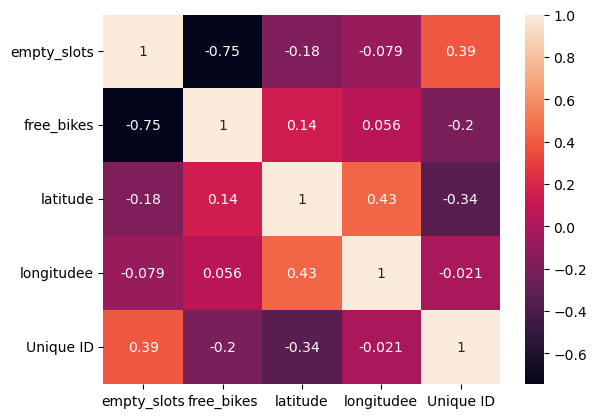

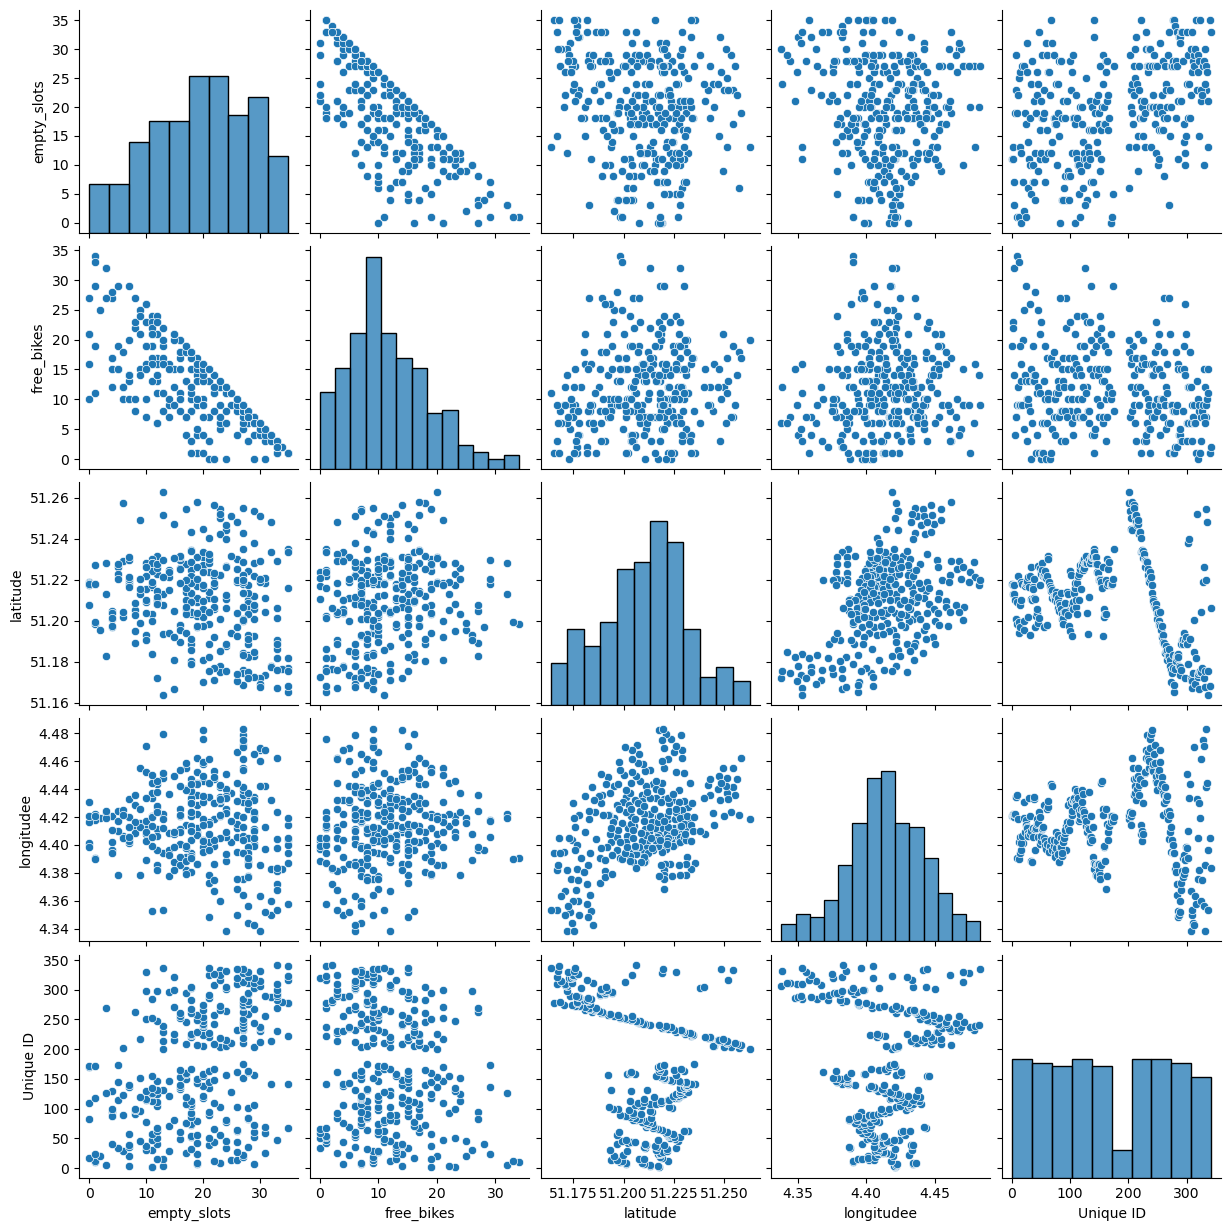

In [36]:
sns.pairplot(data=live_station_data)
plt.show()

In [192]:
X = live_station_data[live_station_data.columns[~live_station_data.columns.isin(['empty_slots'])]]
y = live_station_data['empty_slots']

In [257]:
X.shape

(303, 10)

In [ ]:
X.head()

In [259]:
y.head()

0    11
1     7
2     8
3     4
4    28
Name: empty_slots, dtype: int64

# MODELING


In [261]:
import statsmodels.api as sm

In [312]:
df.describe()

,empty_slots,free_bikes,latitude,longitudee,Unique ID
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,19.231023,11.775578,51.210407,4.414415,168.006601
std,8.794533,7.003485,0.021311,0.028565,101.364727
min,0.000000,0.000000,51.163790,4.338246,1.000000
25%,12.000000,7.000000,51.196787,4.396712,79.500000
50%,20.000000,11.000000,51.212334,4.413912,156.000000
75%,27.000000,16.000000,51.224817,4.433569,259.500000
max,35.000000,34.000000,51.262628,4.483170,342.000000


In [263]:
X = sm.add_constant(X) #adding a constant

In [310]:
lin_reg = sm.OLS(y,X['free_bikes'])

In [311]:
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            empty_slots   R-squared (uncentered):                   0.389
Model:                            OLS   Adj. R-squared (uncentered):              0.387
Method:                 Least Squares   F-statistic:                              192.6
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    3.23e-34
Time:                        18:25:12   Log-Likelihood:                         -1279.7
No. Observations:                 303   AIC:                                      2561.
Df Residuals:                     302   BIC:                                      2565.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [226]:
df = pd.DataFrame(live_station_data)

In [231]:
df

,Station Name,empty_slots,free_bikes,payment,latitude,longitudee,timestamp,Unique ID
0,001- Centraal Station - Astrid,11,19,"K, o, n, i, n, g, i, n, , A, s, t, r, i, d, p...",51.217820,4.420650,2023-01-09T17:49:13.145000Z,1
1,020- Groenplaats 2,7,20,"G, r, o, e, n, k, e, r, k, h, o, f, s, t, r, a...",51.218800,4.401000,2023-01-09T17:49:13.177000Z,20
2,093- Sint Vincentius,8,22,"s, i, n, t, , v, i, n, c, e, n, t, i, u, s",51.205410,4.413560,2023-01-09T17:49:13.311000Z,93
3,094- Paleisstraat,4,27,"P, a, l, e, i, s, s, t, r, a, a, t,",51.204800,4.396100,2023-01-09T17:49:13.312000Z,94
4,101- Premetro Handel,28,8,"L, a, n, g, e, , S, t, u, i, v, e, n, b, e, r...",51.224100,4.432000,2023-01-09T17:49:13.320000Z,101
...,...,...,...,...,...,...,...,...
298,335- Speelplein,26,10,"S, p, e, e, l, p, l, e, i, n, s, t, r, a, a, t...",51.248223,4.444239,2023-01-09T17:49:13.619000Z,335
299,336 -Sneeuwbeslaan,21,15,"S, n, e, e, u, w, b, e, s, l, a, a, n, /, L, a...",51.175707,4.396217,2023-01-09T17:49:13.620000Z,336
300,337 - Verenigde Naties,13,11,"V, e, r, e, n, i, g, d, e, , N, a, t, i, e, s...",51.163790,4.353356,2023-01-09T17:49:13.621000Z,337
301,340 - Dokter Donny,35,1,"D, o, k, t, e, r, , D, o, n, n, y, p, l, e, i, n",51.168131,4.404972,2023-01-09T17:49:13.631000Z,340


In [206]:
df.to_csv(r'/Users/tativalentine/Documents/GitHub/Statistical-Modelling-with-Python\city_bikesant.csv', index=False)

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_10057/1251829298.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

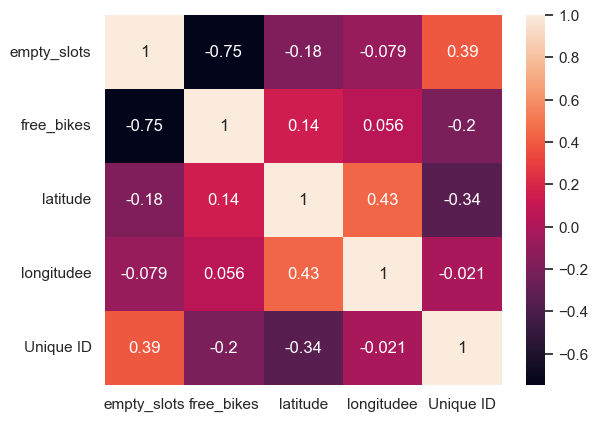

In [208]:
sns.heatmap(live_station_data.corr(),annot=True)

In [44]:
corr_matrix = live_station_data.corr()
corr_matrix = ["y"].sort(reverse=False)

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_10057/1128504304.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Visualizations

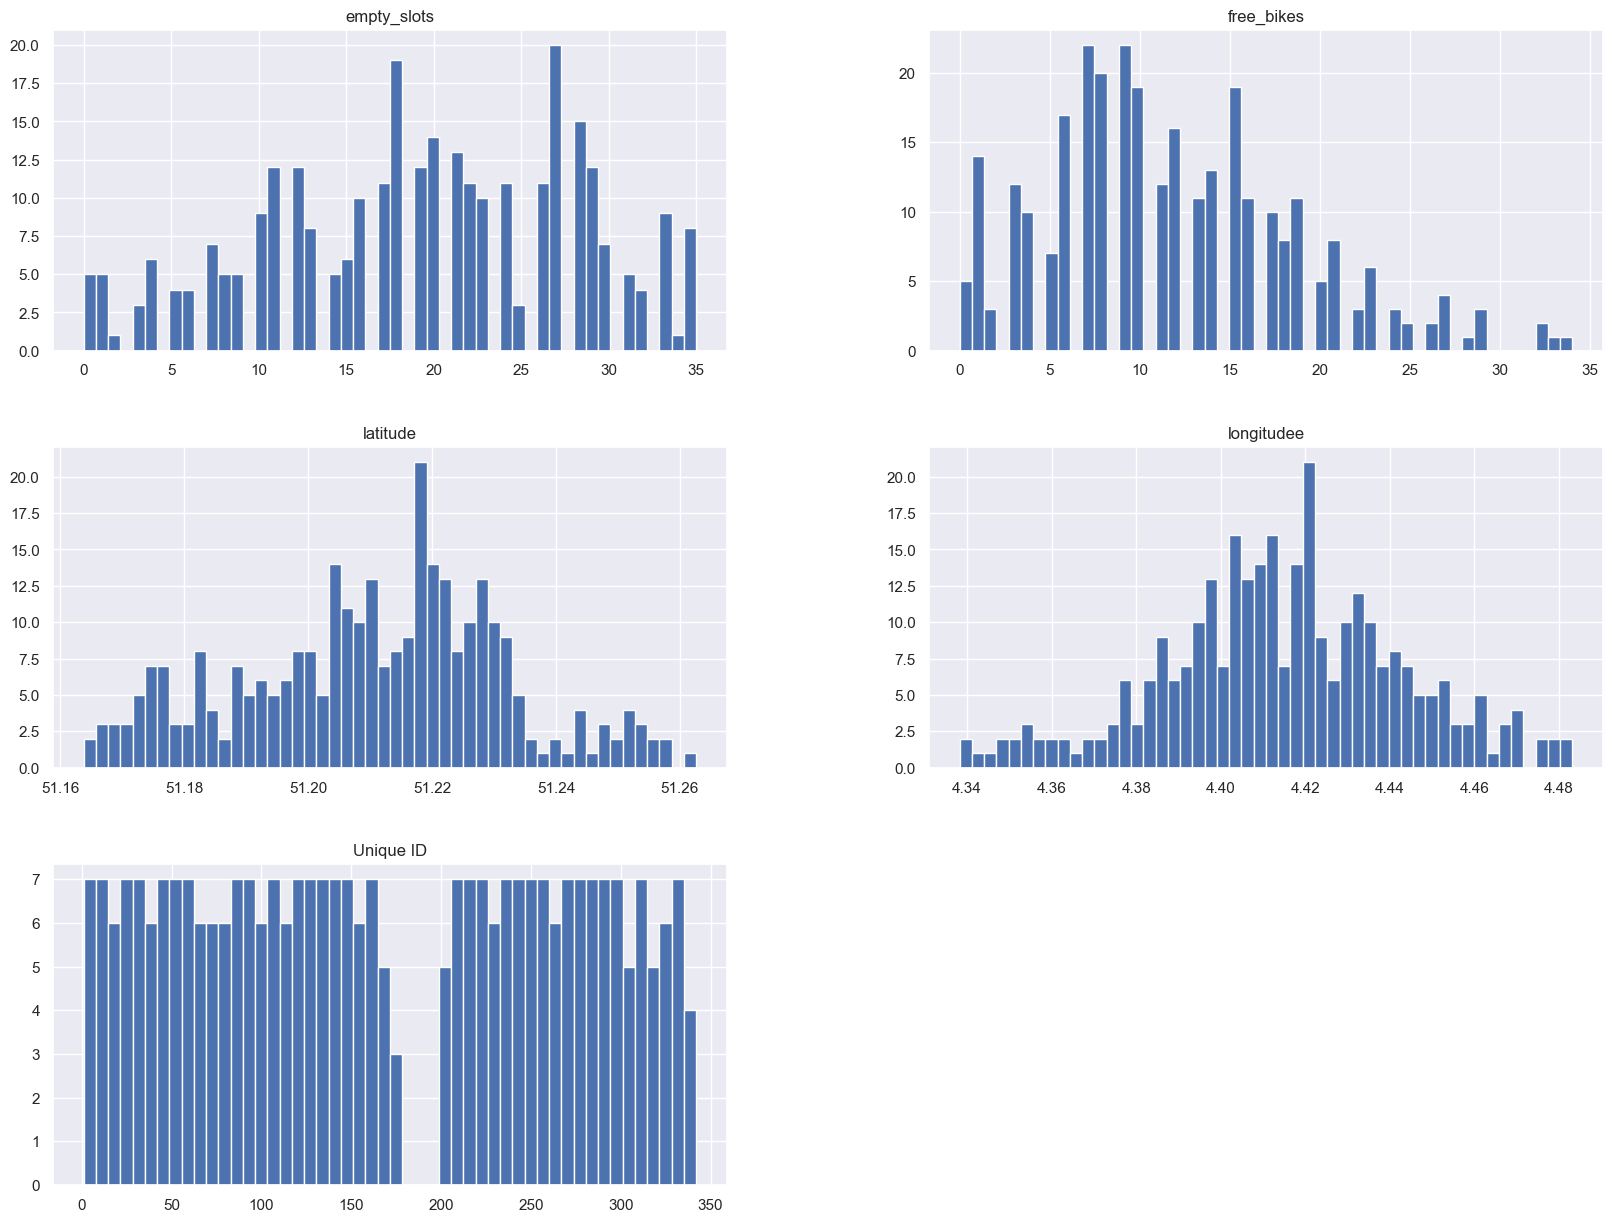

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt
live_station_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

<AxesSubplot:xlabel='free_bikes', ylabel='Count'>

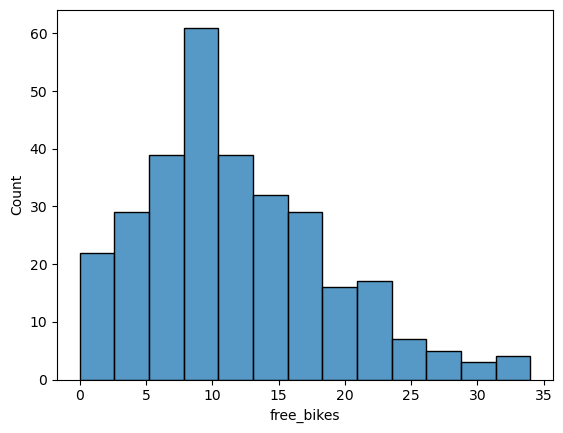

In [48]:
sns.histplot(live_station_data['free_bikes'])

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_10057/4132102992.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



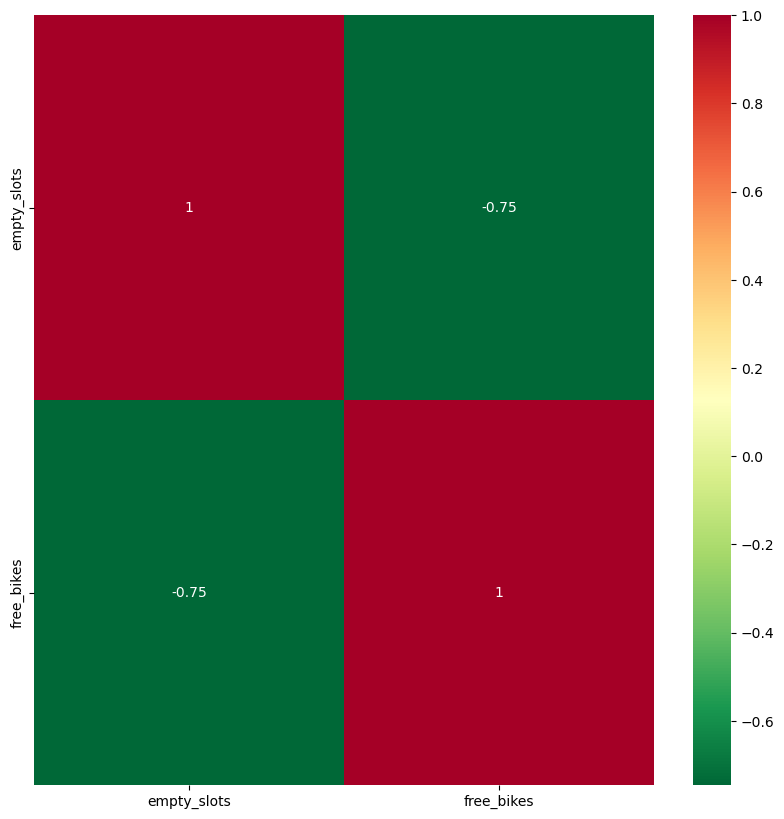

In [49]:
cormat = live_station_data.corr()
top_corr_features = cormat.index[abs(cormat["free_bikes"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(live_station_data[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

# BOXPLOTS

<AxesSubplot:ylabel='free_bikes'>

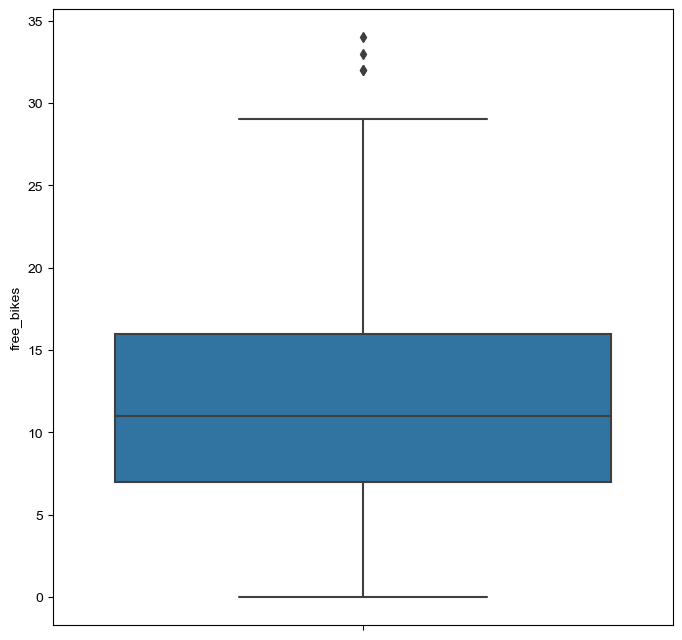

In [50]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=live_station_data.free_bikes, color='tab:blue')

<AxesSubplot:ylabel='empty_slots'>

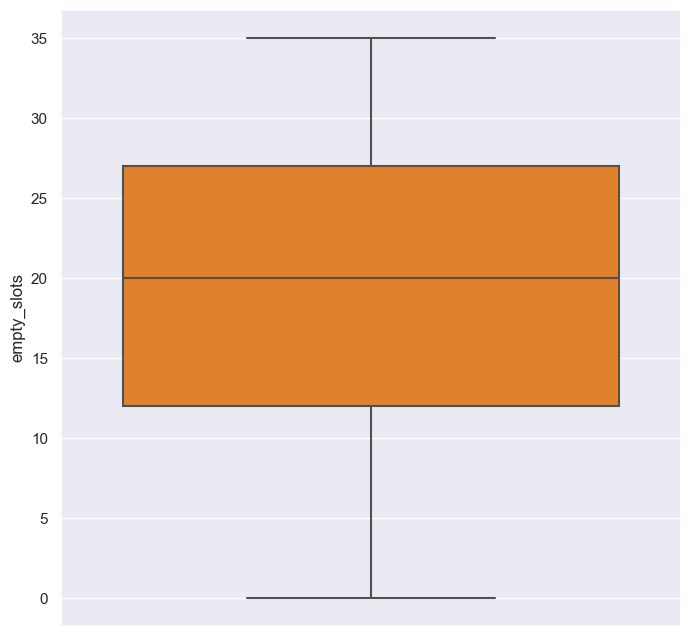

In [51]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=live_station_data.empty_slots, color='tab:orange')